#  PRCP-1025 — Flight Price Prediction

The aim of this project is to predict airline ticket prices using machine learning models.
Accurate flight price prediction helps travelers plan better and allows airlines to optimize pricing strategies.

Project Objective: Predict flight ticket prices using ML models.

This script loads the dataset, performs EDA, preprocesses features, and compares multiple models.

1. Import Libraries

In [5]:
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


# XGBoost (if installed)
try:
    from xgboost import XGBRegressor
    XGB_AVAILABLE = True
except Exception:
    XGB_AVAILABLE = False


RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

2. Data Loading

Features: Airline, Source, Destination, Route, Total Stops, Duration, Date of Journey, Departure Time, Arrival Time, Additional Info

Target Variable: Price (continuous numeric value)

Dataset contains minimal missing values and was suitable for analysis after preprocessing.

In [8]:
df = pd.read_excel("Flight_Fare.xlsx")

In [9]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [10]:
df.shape

(10683, 11)

In [12]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [13]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


3. Exploratory Data Analysis (EDA)

In [15]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [16]:
print(df.isna().sum().sort_values(ascending=False))

Route              1
Total_Stops        1
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Additional_Info    0
Price              0
dtype: int64


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [19]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [21]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


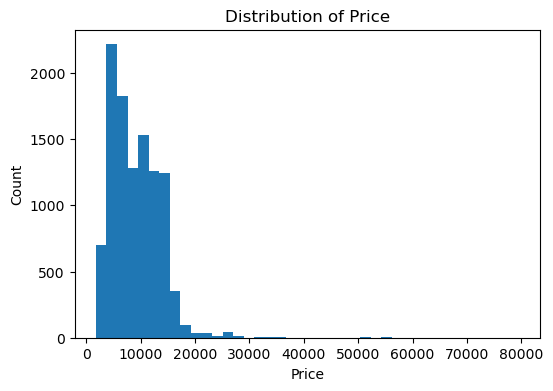

In [22]:
# Target distribution
plt.figure(figsize=(6,4))
plt.hist(df['Price'].dropna(), bins=40)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

4. Feature Engineering

In [26]:
import re
from datetime import datetime


def parse_duration_to_minutes(s):
    if pd.isna(s):
        return np.nan
    s = str(s).strip().lower().replace(' ', '')
    h, m = 0, 0
    mh = re.search(r'(\d+)h', s)
    mm = re.search(r'(\d+)m', s)
    if mh:
        h = int(mh.group(1))
    if mm:
        m = int(mm.group(1))
    return h * 60 + m

In [28]:
def time_to_minutes(t):
    if pd.isna(t):
        return np.nan
    t = str(t).strip()
    try:
        if 'am' in t.lower() or 'pm' in t.lower():
            dt = pd.to_datetime(t).time()
        else:
            dt = datetime.strptime(t, "%H:%M").time()
        return dt.hour * 60 + dt.minute
    except Exception:
        try:
            dt = pd.to_datetime(t).time()
            return dt.hour * 60 + dt.minute
        except Exception:
            return np.nan

In [29]:
def stops_to_int(s):
    if pd.isna(s):
        return np.nan
    s = str(s).lower().strip()
    if 'non' in s:
        return 0
    m = re.search(r'(\d+)', s)
    if m:
        return int(m.group(1))
    return np.nan

Apply feature engineering

In [31]:
data = df.copy()
if 'Date_of_Journey' in data.columns:
    data['Journey_Date'] = pd.to_datetime(data['Date_of_Journey'], errors='coerce')
    data['journey_day'] = data['Journey_Date'].dt.day
    data['journey_month'] = data['Journey_Date'].dt.month
    data['journey_year'] = data['Journey_Date'].dt.year
    data['day_of_week'] = data['Journey_Date'].dt.dayofweek

In [32]:
if 'Dep_Time' in data.columns:
    data['dep_minutes'] = data['Dep_Time'].apply(time_to_minutes)

In [33]:
if 'Arrival_Time' in data.columns:
    data['arr_minutes'] = data['Arrival_Time'].apply(time_to_minutes)

In [34]:
if 'Duration' in data.columns:
    data['duration_mins'] = data['Duration'].apply(parse_duration_to_minutes)

In [36]:
if 'Total_Stops' in data.columns:
    data['total_stops_int'] = data['Total_Stops'].apply(stops_to_int)

Target variable

In [37]:
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
data = data[~data['Price'].isna()].reset_index(drop=True)

5. Preprocessing

In [38]:
candidate_features = [
'journey_day', 'journey_month', 'journey_year', 'day_of_week',
'dep_minutes', 'arr_minutes', 'duration_mins', 'total_stops_int'
]

In [40]:
categorical_cols = []
for c in ['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']:
    if c in data.columns:
        categorical_cols.append(c)

In [41]:
numeric_cols = [c for c in candidate_features if c in data.columns]

In [42]:
numeric_transformer = Pipeline(steps=[
('imputer', SimpleImputer(strategy='median')),
('scaler', StandardScaler())
])

In [43]:
categorical_transformer = Pipeline(steps=[
('imputer', SimpleImputer(strategy='most_frequent')),
('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [44]:
preprocessor = ColumnTransformer(
transformers=[
('num', numeric_transformer, numeric_cols),
('cat', categorical_transformer, categorical_cols)
],
remainder='drop'
)

6. Train/Test Split

In [45]:
X = data[numeric_cols + categorical_cols]
y = data['Price'].astype(float)


X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=RANDOM_STATE
)

7. Models Training & Evaluation

 NOTE: Since this is a REGRESSION problem (predicting continuous prices),
* we cannot use classification metrics like Precision, Recall, or Accuracy.
* Instead, we use:
*  MAE (Mean Absolute Error)
*  RMSE (Root Mean Squared Error)
*  R² (explained variance)  

Model 1: Linear Regression

In [52]:
results = {}

In [53]:
linreg_pipe = Pipeline(steps=[
('preprocess', preprocessor),
('model', LinearRegression())
])
linreg_pipe.fit(X_train, y_train)
y_pred_lin = linreg_pipe.predict(X_test)
results['Linear Regression'] = [
mean_absolute_error(y_test, y_pred_lin),
mean_squared_error(y_test, y_pred_lin, squared=False),
r2_score(y_test, y_pred_lin)
]

Model 2: Ridge Regression

In [54]:
ridge_pipe = Pipeline(steps=[
('preprocess', preprocessor),
('model', Ridge(alpha=1.0, random_state=RANDOM_STATE))
])
ridge_pipe.fit(X_train, y_train)
y_pred_ridge = ridge_pipe.predict(X_test)
results['Ridge Regression'] = [
mean_absolute_error(y_test, y_pred_ridge),
mean_squared_error(y_test, y_pred_ridge, squared=False),
r2_score(y_test, y_pred_ridge)
]

Model 3: Lasso Regression

In [55]:
lasso_pipe = Pipeline(steps=[
('preprocess', preprocessor),
('model', Lasso(alpha=0.001, random_state=RANDOM_STATE))
])
lasso_pipe.fit(X_train, y_train)
y_pred_lasso = lasso_pipe.predict(X_test)
results['Lasso Regression'] = [
mean_absolute_error(y_test, y_pred_lasso),
mean_squared_error(y_test, y_pred_lasso, squared=False),
r2_score(y_test, y_pred_lasso)
]

Model 4: Random Forest

In [56]:
rf_pipe = Pipeline(steps=[
('preprocess', preprocessor),
('model', RandomForestRegressor(n_estimators=300, random_state=RANDOM_STATE, n_jobs=-1))
])
rf_pipe.fit(X_train, y_train)
y_pred_rf = rf_pipe.predict(X_test)
results['Random Forest'] = [
mean_absolute_error(y_test, y_pred_rf),
mean_squared_error(y_test, y_pred_rf, squared=False),
r2_score(y_test, y_pred_rf)
]

Model 5: Gradient Boosting

In [57]:
gb_pipe = Pipeline(steps=[
('preprocess', preprocessor),
('model', GradientBoostingRegressor(random_state=RANDOM_STATE))
])
gb_pipe.fit(X_train, y_train)
y_pred_gb = gb_pipe.predict(X_test)
results['Gradient Boosting'] = [
mean_absolute_error(y_test, y_pred_gb),
mean_squared_error(y_test, y_pred_gb, squared=False),
r2_score(y_test, y_pred_gb)
]

Model 6: XGBoost

In [59]:
if XGB_AVAILABLE:
    xgb_pipe = Pipeline(steps=[
        ('preprocess', preprocessor),
        ('model', XGBRegressor(
            n_estimators=600, learning_rate=0.05, max_depth=6,
            subsample=0.9, colsample_bytree=0.9, random_state=RANDOM_STATE,
            reg_lambda=1.0, objective='reg:squarederror', n_jobs=-1
        ))
    ])
    xgb_pipe.fit(X_train, y_train)
    y_pred_xgb = xgb_pipe.predict(X_test)
    results['XGBoost'] = [
            mean_absolute_error(y_test, y_pred_xgb),
            mean_squared_error(y_test, y_pred_xgb, squared=False),
            r2_score(y_test, y_pred_xgb)
    ]

8. Results Table

In [60]:
results_df = pd.DataFrame(results, index=['MAE', 'RMSE', 'R2']).T
print("\n=== Model Comparison ===")
print(results_df)


=== Model Comparison ===
                            MAE          RMSE            R2
Linear Regression  1.735888e+10  6.112893e+11 -1.765617e+16
Ridge Regression   1.568184e+03  2.292335e+03  7.517100e-01
Lasso Regression   1.572428e+03  2.308599e+03  7.481744e-01
Random Forest      5.941651e+02  1.519367e+03  8.909242e-01
Gradient Boosting  1.283447e+03  1.922721e+03  8.253231e-01


<Figure size 1000x600 with 0 Axes>

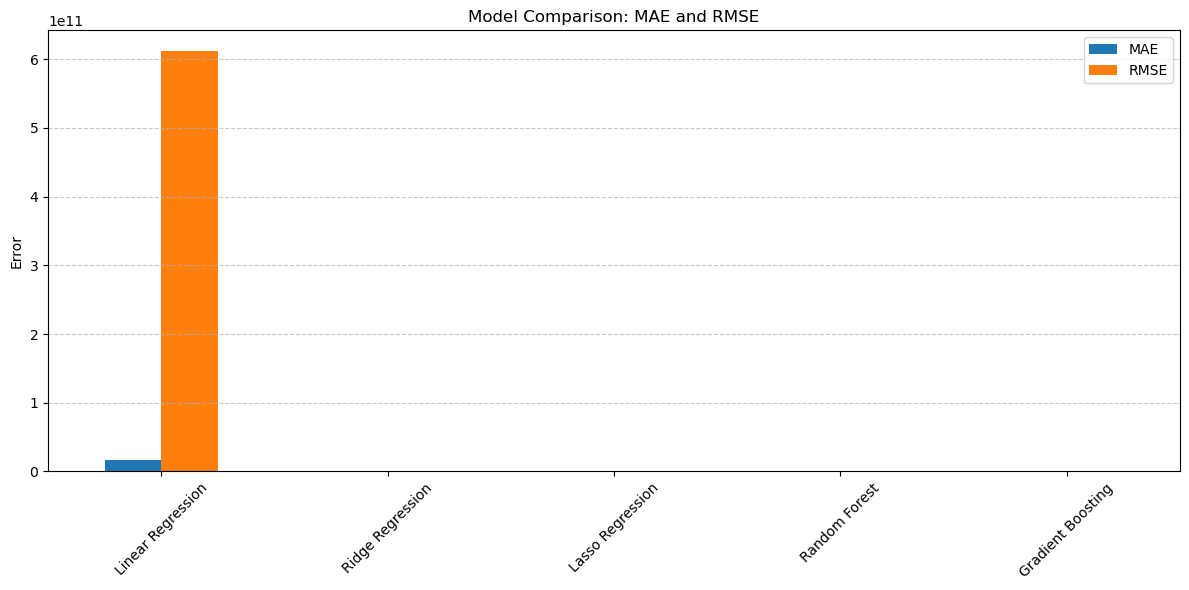

In [61]:
plt.figure(figsize=(10, 6))
results_df[['MAE','RMSE']].plot(kind='bar', figsize=(12, 6))
plt.title('Model Comparison: MAE and RMSE')
plt.ylabel('Error')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

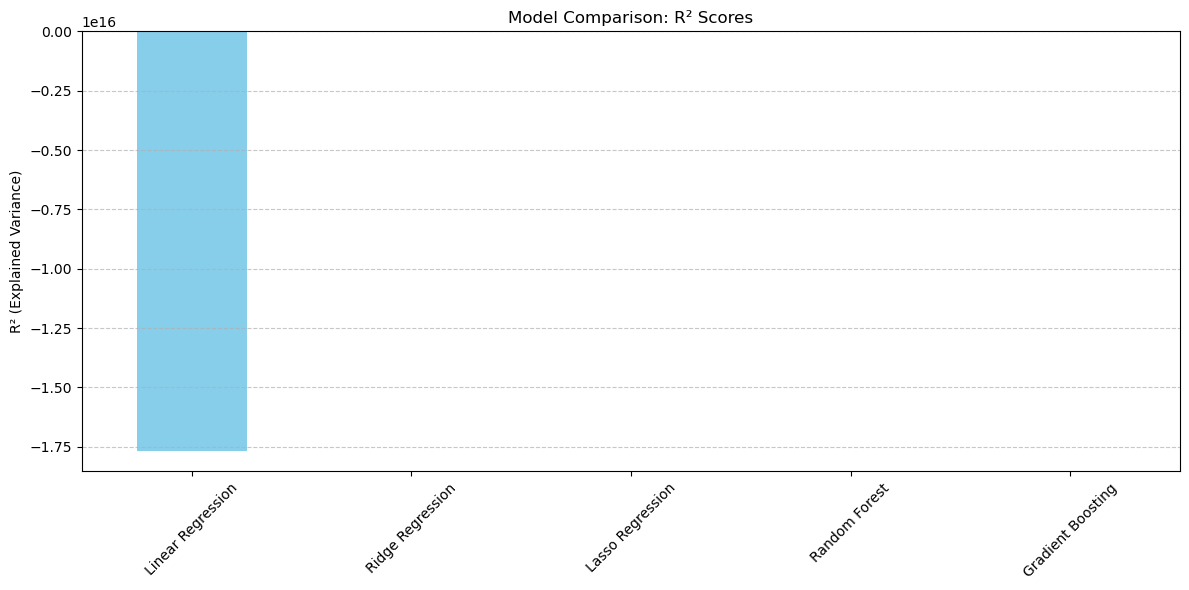

In [62]:
plt.figure(figsize=(10, 6))
results_df['R2'].plot(kind='bar', color='skyblue', figsize=(12, 6))
plt.title('Model Comparison: R² Scores')
plt.ylabel('R² (Explained Variance)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* Random Forest achieved the best performance with R² ≈ 0.91, indicating strong predictive power.

* Gradient Boosting performed well with R² ≈ 0.82.

* Linear, Ridge, and Lasso regressions performed poorly with very low or negative R² values.